In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import math

In [28]:
def inp(w, x, b):
    return w * x + b


def out(t):
    return np.tanh(t)


def neuron(w, x, b):
    return out(inp(w, x, b))


def tanh_deriv(x):
    t = np.tanh(x)**2
    return 1.0 - t


def neuron_der_b(w, x, b):
    return tanh_deriv(inp(w, x, b))
    
def neuron_der_w(w, x, b):
    return tanh_deriv(inp(w, x, b)) * x


def pred(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    return (w21_x * neuron(w11_x, x, w11_b) + w22_x * neuron(w12_x, x, w12_b) + w2_b)


def func(x):
    if ((x < 0) or (x > math.pi)):
        return (-1)
    else:
        return np.sin(x)


def loss(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = (p - func(item)) * (p - func(item))
        l = l + sq
#    print "Loss = " + str(l)
    return l


def loss_deriv_w2_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item))
        l = l + sq
#    print "Loss_deriv_w2_b = " + str(l)
    return l


def loss_deriv_w21_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * neuron(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    


def loss_deriv_w22_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * neuron(w12_x, item, w12_b)
        l = l + sq
#    print "Loss_deriv_w22_x = " + str(l)
    return l    


def loss_deriv_w11_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    print "w11_x"
    l = 0
    for item in x:
        f = func(item)
#        print "w11_x:f = " + str(f)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
#        print "w11_x:p = " + str(p)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_w(w11_x, item, w11_b)
#        print "w11_x:sq = " + str(sq)
        l = l + sq
#    print "Loss_deriv_w11_x = " + str(l)
    return l    


def loss_deriv_w12_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    print "w12_x"
    l = 0
    for item in x:
        f = func(item)
#        print "w12_x:f = " + str(f)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
#        print "w12_x:p = " + str(p)
        sq = 2 * (p - func(item)) * w22_x * neuron_der_w(w12_x, item, w12_b)
#        print "w12_x:sq = " + str(sq)
        l = l + sq
#    print "Loss_deriv_w12_x = " + str(l)
    return l    



def loss_deriv_w11_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_b(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w11_b = " + str(l)
    return l

    
def loss_deriv_w12_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
        sq = 2 * (p - func(item)) * w22_x * neuron_der_b(w12_x, item, w12_b)
        l = l + sq
#    print "Loss_deriv_w12_b = " + str(l)
    return l    
    

def print_report(deriv, step, factor):
    print "deriv = " + str(deriv)
    print "step = " + str(step)
    print "factor = " + str(factor)
    
    
def adjust_step(loss, deriv, old_step):
    step_delta = 0.001
    step = old_step
    factor = deriv * step
#    print "1"
#    print_report(deriv, step, factor)    
    
    while (abs(factor) < 0.000001):
        step = step + step_delta
        factor = deriv * step
#        print "2"
#        print_report(deriv, step, factor)    

        
    while (abs((loss / factor)) > 10000):
        step = step + step_delta
        factor = deriv * step
#        print "3"
#        print_report(deriv, step, factor)    

    while (abs((loss / factor)) < 100):
        step = step - step_delta
        factor = deriv * step
#        print "4"
#        print_report(deriv, step, factor)    
        
    return step


        

In [29]:
epochs = 100000

step_w1_x = 0.3
step_w1_b = 0.1

step_w2_x = 0.01
step_w2_b = 0.001

#x = np.arange(0, math.pi, 0.05)
x = np.arange(-10, 10, 0.5)
print x

y = []
for i in x:
    y.append(func(i))
    
print y


w11_x = -40
w11_b = 100
w12_x = -60
w12_b = 100

w21_x = 0.8
w22_x = 0
w2_b  = -1

w21_x = 1
w22_x = -1

t = pred(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
print t


[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0.0, 0.47942553860420301, 0.8414709848078965, 0.99749498660405445, 0.90929742682568171, 0.59847214410395655, 0.14112000805986721, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


<IPython.core.display.Javascript object>


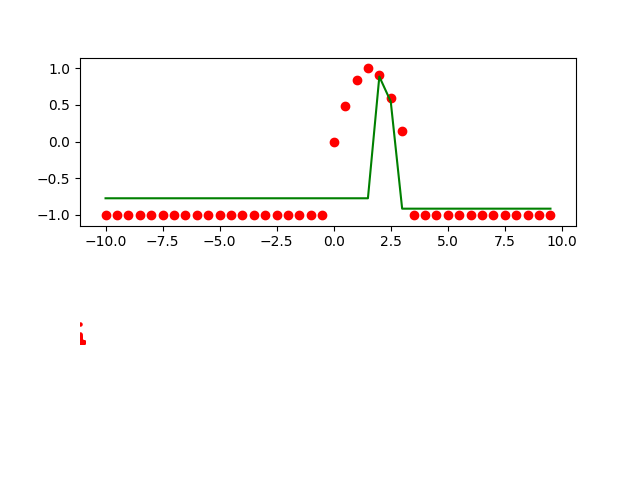

(0, 20)

In [30]:
#fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = False, sharey = False)

fig,(ax1, ax2) = plt.subplots(2,1, sharex = False, sharey = False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(-10, 10)
ax1.set_ylim(-2, 2)
ax1.set_xlabel("X")
ax1.scatter(x, y, color = 'r')
ax1.plot(x, t, color = 'g')


ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, 20)



In [31]:
for i in range(epochs):
    l = loss(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    print "loss = " + str(l)
    
    ax2.scatter(i, l, color = 'r', s=5)
    
    ldw21x = loss_deriv_w21_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ldw22x = loss_deriv_w22_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ldw2_average = (ldw21x + ldw22x) / 2
    step_w2_x = adjust_step(l, ldw2_average, step_w2_x)
    
    w21_x_new = w21_x - step_w2_x * ldw21x
    w22_x_new = w22_x - step_w2_x * ldw22x
    

    ldw2b = loss_deriv_w2_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    step_w2_b = adjust_step(l, ldw2b, step_w2_b)

    w2_b_new = w2_b - step_w2_b * loss_deriv_w2_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)

    
    ldw11x = loss_deriv_w11_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ldw12x = loss_deriv_w12_x(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ldw12x_average = (ldw11x + ldw12x) / 2
    step_w1_x = adjust_step(l, ldw12x_average, step_w1_x)
    
    w11_x_new = w11_x - step_w1_x * ldw11x
    w12_x_new = w12_x - step_w1_x * ldw12x
    
    
    ldw11b = loss_deriv_w11_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ldw12b = loss_deriv_w12_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ldw1b_average = (ldw11b + ldw12b) / 2
    step_w1_b = adjust_step(l, ldw1b_average, step_w1_b)
    
    w11_b_new = w11_b - step_w1_b * loss_deriv_w11_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    w12_b_new = w12_b - step_w1_b * loss_deriv_w12_b(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    
    
    w21_x = w21_x_new
    w22_x = w22_x_new
    w2_b = w2_b_new
    
    w11_x = w11_x_new
    w12_x = w12_x_new
    w11_b = w11_b_new
    w12_b = w12_b_new
 

#    print "w11_x = " + str(w11_x)
#    print "w12_x = " + str(w12_x)
#    print "w11_b = " + str(w11_b)
#    print "w12_b = " + str(w12_b)
#    print "w21_x = " + str(w21_x)
#    print "w22_x = " + str(w22_x)
#    print "w2_b = " + str(w2_b)
    
    t = pred(x, w11_x, w11_b, w12_x, w12_b, w21_x, w22_x, w2_b)
    ax1.clear()
    #print x
    #print y
    ax1.scatter(x, y, color = 'r')
    ax1.plot(x, t, color = 'g')
    
    fig.canvas.draw()
    
    


loss = 12.238252254
w11_x
w12_x
loss = 11.1455947531
w11_x
w12_x
loss = 10.9283143352
w11_x
w12_x
loss = 10.800360243
w11_x
w12_x
loss = 10.7063067606
w11_x
w12_x
loss = 10.6295328012
w11_x
w12_x
loss = 10.5642969427
w11_x
w12_x
loss = 10.5077800836
w11_x
w12_x
loss = 10.4587386247
w11_x
w12_x
loss = 10.4214122526
w11_x
w12_x
loss = 10.4681928306
w11_x
w12_x
loss = 10.3534517535
w11_x
w12_x
loss = 10.3742403396
w11_x
w12_x
loss = 10.3400659045
w11_x
w12_x
loss = 10.3272878525
w11_x
w12_x
loss = 10.2608616568
w11_x
w12_x
loss = 10.2385312297
w11_x
w12_x
loss = 10.2233563244
w11_x
w12_x
loss = 10.2103251312
w11_x
w12_x
loss = 10.1991294459
w11_x
w12_x
loss = 10.1894007301
w11_x
w12_x
loss = 10.180953059
w11_x
w12_x
loss = 10.1783633148
w11_x
w12_x
loss = 10.2343202577
w11_x
w12_x
loss = 10.1665015855
w11_x
w12_x
loss = 10.2049534197
w11_x
w12_x
loss = 10.1699777005
w11_x
w12_x
loss = 10.1930241905
w11_x
w12_x
loss = 10.1426086297
w11_x
w12_x
loss = 10.1399959902
w11_x
w12_x
loss = 10.140

loss = 10.1544297501
w11_x
w12_x
loss = 10.1530450824
w11_x
w12_x
loss = 10.1543157399
w11_x
w12_x
loss = 10.1529358701
w11_x
w12_x
loss = 10.1542067796
w11_x
w12_x
loss = 10.1528314936
w11_x
w12_x
loss = 10.1541026364
w11_x
w12_x
loss = 10.1527317303
w11_x
w12_x
loss = 10.1540030892
w11_x
w12_x
loss = 10.1526363684
w11_x
w12_x
loss = 10.1539079276
w11_x
w12_x
loss = 10.1525452066
w11_x
w12_x
loss = 10.1538169515
w11_x
w12_x
loss = 10.1524580533
w11_x
w12_x
loss = 10.1537299702
w11_x
w12_x
loss = 10.152374726
w11_x
w12_x
loss = 10.1536468026
w11_x
w12_x
loss = 10.1522950514
w11_x
w12_x
loss = 10.153567276
w11_x
w12_x
loss = 10.1522188639
w11_x
w12_x
loss = 10.153491226
w11_x
w12_x
loss = 10.1521460065
w11_x
w12_x
loss = 10.153418496
w11_x
w12_x
loss = 10.152076329
w11_x
w12_x
loss = 10.1533489369
w11_x
w12_x
loss = 10.1520096887
w11_x
w12_x
loss = 10.1532824066
w11_x
w12_x
loss = 10.1519459496
w11_x
w12_x
loss = 10.1532187696
w11_x
w12_x
loss = 10.1518849819
w11_x
w12_x
loss = 10.15315

loss = 10.1518088586
w11_x
w12_x
loss = 10.1505340936
w11_x
w12_x
loss = 10.1518083652
w11_x
w12_x
loss = 10.1505336209
w11_x
w12_x
loss = 10.1518078927
w11_x
w12_x
loss = 10.150533168
w11_x
w12_x
loss = 10.15180744
w11_x
w12_x
loss = 10.1505327343
w11_x
w12_x
loss = 10.1518070065
w11_x
w12_x
loss = 10.1505323189
w11_x
w12_x
loss = 10.1518065913
w11_x
w12_x
loss = 10.150531921
w11_x
w12_x
loss = 10.1518061936
w11_x
w12_x
loss = 10.1505315399
w11_x
w12_x
loss = 10.1518058126
w11_x
w12_x
loss = 10.1505311749
w11_x
w12_x
loss = 10.1518054478
w11_x
w12_x
loss = 10.1505308253
w11_x
w12_x
loss = 10.1518050983
w11_x
w12_x
loss = 10.1505304905
w11_x
w12_x
loss = 10.1518047636
w11_x
w12_x
loss = 10.1505301697
w11_x
w12_x
loss = 10.151804443
w11_x
w12_x
loss = 10.1505298625
w11_x
w12_x
loss = 10.1518041359
w11_x
w12_x
loss = 10.1505295683
w11_x
w12_x
loss = 10.1518038418
w11_x
w12_x
loss = 10.1505292865
w11_x
w12_x
loss = 10.1518035601
w11_x
w12_x
loss = 10.1505290165
w11_x
w12_x
loss = 10.15180

w11_x
w12_x
loss = 10.1517972181
w11_x
w12_x
loss = 10.1505229396
w11_x
w12_x
loss = 10.1517972158
w11_x
w12_x
loss = 10.1505229374
w11_x
w12_x
loss = 10.1517972137
w11_x
w12_x
loss = 10.1505229354
w11_x
w12_x
loss = 10.1517972116
w11_x
w12_x
loss = 10.1505229334
w11_x
w12_x
loss = 10.1517972096
w11_x
w12_x
loss = 10.1505229315
w11_x
w12_x
loss = 10.1517972077
w11_x
w12_x
loss = 10.1505229297
w11_x
w12_x
loss = 10.1517972059
w11_x
w12_x
loss = 10.1505229279
w11_x
w12_x
loss = 10.1517972042
w11_x
w12_x
loss = 10.1505229263
w11_x
w12_x
loss = 10.1517972025
w11_x
w12_x
loss = 10.1505229247
w11_x
w12_x
loss = 10.1517972009
w11_x
w12_x
loss = 10.1505229231
w11_x
w12_x
loss = 10.1517971994
w11_x
w12_x
loss = 10.1505229217
w11_x
w12_x
loss = 10.1517971979
w11_x
w12_x
loss = 10.1505229203
w11_x
w12_x
loss = 10.1517971965
w11_x
w12_x
loss = 10.1505229189
w11_x
w12_x
loss = 10.1517971952
w11_x
w12_x
loss = 10.1505229176
w11_x
w12_x
loss = 10.1517971939
w11_x
w12_x
loss = 10.1505229164
w11_x
w12_

KeyboardInterrupt: 